In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

In [17]:

def resultados(df, oficial):
    '''
    select the final of official matches (if official = true) 
    or the row of unofficial matches (official = false)
    If there are results for those types of matches, 
    the number of each is calculated.
    return df[['decades', 'perdio', 'gana', 'empate', 'partidos']
    '''
    if oficial:
        df=df[df['Competencia'] != 'Amistoso']
    else:
        df=df[df['Competencia'] == 'Amistoso']
    
    df['gana']=0
    df['perdio']=0
    df['empate']=0
       
    res=df.groupby(['resultado']).size()
    
         
    if not res.empty:
        for id in res.index:
            df[id]=res[id]
    return df[['decades', 'perdio', 'gana', 'empate', 'partidos']]


def set_data():
    '''
    reads the data from excel, and returns a df 
    with the data of victories in official, 
    unofficial and total matches with the decades as index
    '''

    ofi_retorno= pd.DataFrame()
    ami_retorno= pd.DataFrame()

    decades= list(map(lambda x: (str(x)), range(1910,2020, 10)))

    #every sheet of the document was read
    for decades in decades:
        df=pd.read_excel('data_seleccion_uy.xlsx', sheet_name=decades)
        df['decades']=decades 
        df['partidos']=len(df)
        
        #a copy of the data read on this sheet is passed
        df_of= resultados(df.copy(), True) #true -> oficial
        df_amis=resultados(df.copy(), False) #false -> no oficial

        df_of=df_of.drop_duplicates()
        df_amis=df_amis.drop_duplicates()
        
        #is concatenated to the previous sheets (decades)
        ofi_retorno= pd.concat([ofi_retorno, df_of], ignore_index=True)
        ami_retorno=pd.concat([ami_retorno, df_amis], ignore_index=True)
    
    ofi_retorno.set_index('decades')
    ami_retorno.set_index('decades')


    win=win_perc(ofi_retorno,ami_retorno)
    return win

def win_perc(df1, df2):
    '''
    calculates the winning percentage for each type of match 
    (official and unofficial) and the total percentage
    '''
    retorno=pd.DataFrame()
    retorno['decades']=df2['decades']
    retorno['win_of']=(df1['gana']/df1['partidos'])*100
    retorno['win_amis']=(df2['gana']/df2['partidos'])*100
    retorno['win_total']=((df2['gana']+df1['gana'])/(df2['partidos']+df1['partidos']))*100

    return retorno


<Figure size 432x288 with 0 Axes>

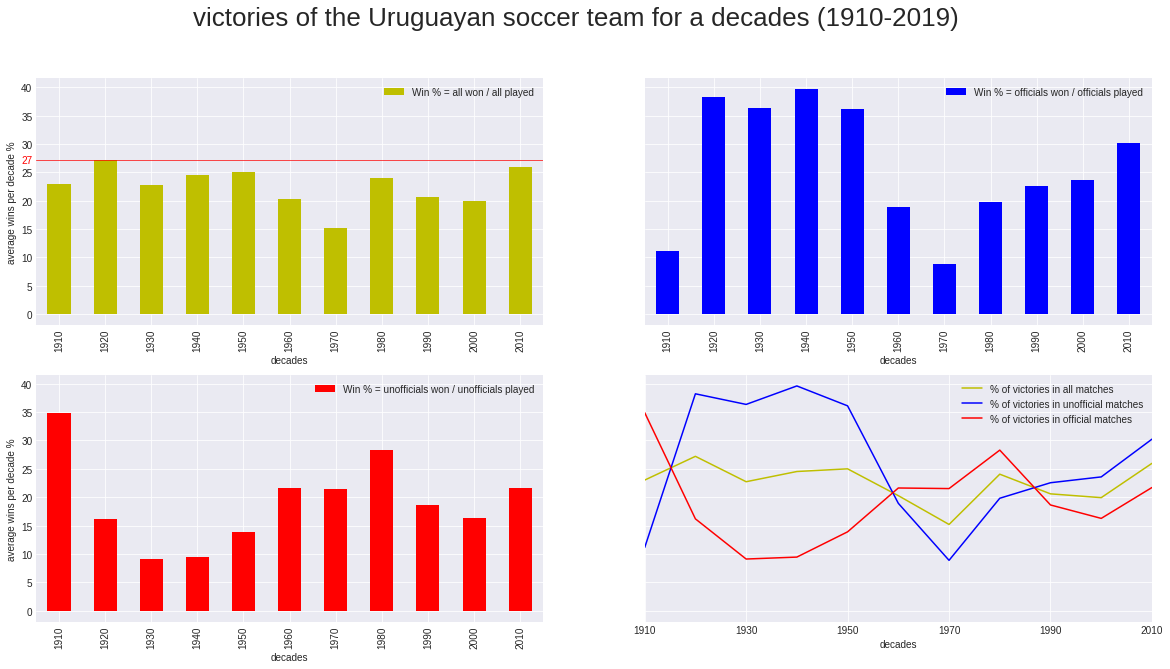

In [21]:
win = set_data()
plt.style.use('seaborn-darkgrid');
best=win['win_total'].max()
plt.figure();
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,10),sharey=True);
plt.suptitle('victories of the Uruguayan soccer team for a decades (1910-2019)',size=26);

win.plot.bar(ax=axes[0,0], x='decades', y='win_total',  color='y',label='Win % = all won / all played');
axes[0,0].set_ylabel('average wins per decade %');
axes[0,0].axhline(best, alpha=0.7, c='r', lw=1);
trans = transforms.blended_transform_factory(
    axes[0,0].get_yticklabels()[0].get_transform(), axes[0,0].transData)
axes[0,0].text(0,best, "{:.0f}".format(best), color="red", transform=trans, 
        ha="right", va="center");

win.plot.bar(ax=axes[0,1], x='decades', y='win_of',  color='b',label='Win % = officials won / officials played');

win.plot.bar(ax=axes[1,0], x='decades', y='win_amis',   color='r',label='Win % = unofficials won / unofficials played');
axes[1,0].set_ylabel('average wins per decade %');

win.plot(ax=axes[1,1], x='decades', y=['win_total','win_of', 'win_amis'], color=['y','b','r'],label=['% of victories in all matches', '% of victories in unofficial matches', '% of victories in official matches']);
